## Choosing features and metrics for nearest neighbor search (using sframe and scikit-learn)

### Import packages

In [2]:
import sframe
import matplotlib.pyplot as plt
import numpy as np # dense matrices
from scipy.sparse import csr_matrix # sparse matrices
%matplotlib inline

[INFO] sframe.cython.cy_server: SFrame v2.1 started. Logging /tmp/sframe_server_1477834318.log


### Load in the dataset

In [3]:
wiki = sframe.SFrame('people_wiki.gl/')
wiki = wiki.add_row_number() # add row number, starting at 0

In [4]:
wiki[0]

{'URI': '<http://dbpedia.org/resource/Digby_Morrell>',
 'id': 0,
 'name': 'Digby Morrell',
 'text': 'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 

In [54]:
wiki['text']

dtype: str
Rows: 59071
['digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the norther

### Extract word count vectors

In [5]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    print "Shape = ", shape
    
    return csr_matrix( (data, indices, indptr), shape)

In [6]:
word_count  = load_sparse_csr('people_wiki_word_count.npz') # pre-processed set of word counts

Shape =  [ 59071 547979]


In [18]:
print "(doc#, word#)  count"
print word_count

(doc#, word#)  count
  (0, 5877)	1
  (0, 92219)	1
  (0, 227191)	1
  (0, 446948)	1
  (0, 468870)	1
  (0, 477285)	5
  (0, 492466)	1
  (0, 509506)	1
  (0, 514262)	1
  (0, 523996)	1
  (0, 528953)	1
  (0, 529843)	1
  (0, 533540)	1
  (0, 535034)	3
  (0, 535475)	1
  (0, 538022)	1
  (0, 538168)	1
  (0, 540827)	1
  (0, 541501)	1
  (0, 541760)	1
  (0, 542488)	1
  (0, 542854)	1
  (0, 542859)	1
  (0, 542919)	1
  (0, 543517)	2
  :	:
  (59070, 547944)	1
  (59070, 547947)	1
  (59070, 547949)	1
  (59070, 547950)	1
  (59070, 547951)	1
  (59070, 547954)	1
  (59070, 547957)	2
  (59070, 547960)	2
  (59070, 547961)	1
  (59070, 547962)	1
  (59070, 547964)	4
  (59070, 547965)	2
  (59070, 547966)	6
  (59070, 547967)	1
  (59070, 547968)	4
  (59070, 547969)	1
  (59070, 547970)	8
  (59070, 547971)	3
  (59070, 547972)	6
  (59070, 547973)	1
  (59070, 547974)	2
  (59070, 547975)	6
  (59070, 547976)	6
  (59070, 547977)	9
  (59070, 547978)	14


In [8]:
word_count.todense()

matrix([[ 0,  0,  0, ..., 13,  4, 27],
        [ 0,  0,  0, ...,  4, 10,  2],
        [ 0,  0,  0, ...,  7,  7, 12],
        ..., 
        [ 0,  0,  0, ...,  6,  4,  9],
        [ 0,  0,  0, ...,  9,  8, 13],
        [ 0,  0,  0, ...,  6,  9, 14]])

In [9]:
map_index_to_word = sframe.SFrame('people_wiki_map_index_to_word.gl/') # mapping between words and integer indices

In [10]:
map_index_to_word

feature,category,index
feature,bioarchaeologist,0
feature,leaguehockey,1
feature,electionruss,2
feature,teramoto,3
feature,trumpeterpercussionist,4
feature,spoofax,5
feature,mendelssohni,6
feature,crosswise,7
feature,yec,8
feature,asianthemed,9


In [11]:
print map_index_to_word[5877], map_index_to_word[477285]

{'category': 'brisbaneafter', 'index': 5877, 'feature': 'feature'} {'category': 'morrell', 'index': 477285, 'feature': 'feature'}


### (Optional) Extracting word count vectors yourself

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [14]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
X = vectorizer.fit_transform(wiki['text'])

In [19]:
print X

  (0, 160700)	1
  (0, 336243)	5
  (0, 96657)	1
  (0, 708)	1
  (0, 359661)	1
  (0, 11155)	1
  (0, 259967)	1
  (0, 203221)	1
  (0, 72929)	3
  (0, 427401)	1
  (0, 202280)	1
  (0, 530198)	1
  (0, 387075)	3
  (0, 532952)	5
  (0, 487957)	27
  (0, 272604)	3
  (0, 58945)	4
  (0, 111996)	2
  (0, 251979)	13
  (0, 202239)	10
  (0, 293594)	4
  (0, 48453)	1
  (0, 528859)	1
  (0, 72776)	1
  (0, 239345)	3
  :	:
  (59070, 104461)	1
  (59070, 475505)	1
  (59070, 138923)	1
  (59070, 180471)	1
  (59070, 374547)	1
  (59070, 152855)	1
  (59070, 138660)	1
  (59070, 386402)	1
  (59070, 371886)	1
  (59070, 307299)	1
  (59070, 257250)	1
  (59070, 156935)	1
  (59070, 266591)	2
  (59070, 336653)	1
  (59070, 22972)	1
  (59070, 250992)	1
  (59070, 126989)	1
  (59070, 419213)	1
  (59070, 414286)	1
  (59070, 193318)	1
  (59070, 135518)	1
  (59070, 149863)	4
  (59070, 193336)	1
  (59070, 149862)	1
  (59070, 501983)	1


In [62]:
print X[0]

  (0, 160700)	1
  (0, 336243)	5
  (0, 96657)	1
  (0, 708)	1
  (0, 359661)	1
  (0, 11155)	1
  (0, 259967)	1
  (0, 203221)	1
  (0, 72929)	3
  (0, 427401)	1
  (0, 202280)	1
  (0, 530198)	1
  (0, 387075)	3
  (0, 532952)	5
  (0, 487957)	27
  (0, 272604)	3
  (0, 58945)	4
  (0, 111996)	2
  (0, 251979)	13
  (0, 202239)	10
  (0, 293594)	4
  (0, 48453)	1
  (0, 528859)	1
  (0, 72776)	1
  (0, 239345)	3
  :	:
  (0, 207275)	2
  (0, 23810)	1
  (0, 510734)	1
  (0, 26672)	1
  (0, 470490)	1
  (0, 184573)	1
  (0, 163902)	1
  (0, 25333)	1
  (0, 395095)	1
  (0, 164319)	1
  (0, 395130)	1
  (0, 452091)	1
  (0, 27234)	1
  (0, 232405)	1
  (0, 128998)	1
  (0, 129472)	1
  (0, 55807)	1
  (0, 174317)	1
  (0, 147538)	1
  (0, 482973)	1
  (0, 383494)	1
  (0, 174892)	1
  (0, 373391)	1
  (0, 131019)	1
  (0, 323149)	1


### Find nearest neighbors using word count vectors

In [23]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [24]:
print wiki[wiki['name']=='Barack Obama']

+-------+-------------------------------+--------------+
|   id  |              URI              |     name     |
+-------+-------------------------------+--------------+
| 35817 | <http://dbpedia.org/resour... | Barack Obama |
+-------+-------------------------------+--------------+
+-------------------------------+
|              text             |
+-------------------------------+
| barack hussein obama ii br... |
+-------------------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


In [25]:
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10)

In [26]:
neighbors = sframe.SFrame({'distance': distances.flatten(), 'id': indices.flatten() })
print wiki.join(neighbors, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+----------------------------+---------------+
|   id  |            name            |    distance   |
+-------+----------------------------+---------------+
| 35817 |        Barack Obama        |      0.0      |
| 24478 |         Joe Biden          | 33.0756708171 |
| 28447 |       George W. Bush       | 34.3947670438 |
| 35357 |      Lawrence Summers      | 36.1524549651 |
| 14754 |        Mitt Romney         | 36.1662826401 |
| 13229 |      Francisco Barrio      | 36.3318042492 |
| 31423 |       Walter Mondale       | 36.4005494464 |
| 22745 | Wynn Normington Hugh-Jones | 36.4965751818 |
| 36364 |         Don Bonker         |  36.633318168 |
|  9210 |        Andy Anstett        | 36.9594372252 |
+-------+----------------------------+---------------+
[10 rows x 3 columns]



### Testing with my own word_count vectors

In [27]:
model2 = NearestNeighbors(metric='euclidean', algorithm='brute')
model2.fit(X)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [29]:
distances2, indices2 = model2.kneighbors(X[35817], n_neighbors=10)

In [30]:
neighbors2 = sframe.SFrame({'distance': distances2.flatten(), 'id': indices2.flatten() })
print wiki.join(neighbors2, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+----------------------------+---------------+
|   id  |            name            |    distance   |
+-------+----------------------------+---------------+
| 35817 |        Barack Obama        |      0.0      |
| 24478 |         Joe Biden          | 33.0151480384 |
| 28447 |       George W. Bush       | 34.3074335968 |
| 14754 |        Mitt Romney         | 35.7910603363 |
| 35357 |      Lawrence Summers      | 36.0693775937 |
| 31423 |       Walter Mondale       | 36.2491379208 |
| 13229 |      Francisco Barrio      | 36.2767142944 |
| 36364 |         Don Bonker         | 36.4005494464 |
| 22745 | Wynn Normington Hugh-Jones | 36.4417343166 |
|  7660 |  Refael (Rafi) Benvenisti  | 36.8374809128 |
+-------+----------------------------+---------------+
[10 rows x 3 columns]



### Interpreting the nearest neighbors

In [33]:
def unpack_dict(matrix, map_index_to_word):
    table = list(map_index_to_word.sort('index')['category'])
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]
 
    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ], data[indptr[i]:indptr[i+1]].tolist())}  \
               for i in xrange(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [34]:
wiki

id,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'they': 1, ..."
2,<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'englishreading': 1,'all': 1, 'bauforschu ..."
4,<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
5,<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'now': 1, 'currently':1, 'less': 1, 'being' ..."
6,<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
7,<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
8,<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
9,<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, ..."


In [35]:
def top_words(name):
    """
    get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name =['word', 'count'])
    return word_count_table.sort('count', ascending=False)

obama_words = top_words('Barack Obama')
print obama_words

barrio_words = top_words('Francisco Barrio')
print barrio_words

+-------+-------+
|  word | count |
+-------+-------+
|  the  |   40  |
|   in  |   30  |
|  and  |   21  |
|   of  |   18  |
|   to  |   14  |
|  his  |   11  |
| obama |   9   |
|  act  |   8   |
|   a   |   7   |
|   he  |   7   |
+-------+-------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------+-------+
|    word   | count |
+-----------+-------+
|    the    |   36  |
|     of    |   24  |
|    and    |   18  |
|     in    |   17  |
|     he    |   10  |
|     to    |   9   |
| chihuahua |   7   |
|     a     |   6   |
|  governor |   6   |
|     as    |   5   |
+-----------+-------+
[225 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [47]:
combined_words = obama_words.join(barrio_words, on='word')
combined_words

word,count,count.1
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


In [48]:
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})

In [49]:
combined_words.sort('Obama', ascending=False)

word,Obama,Barrio
the,40,36
in,30,17
and,21,18
of,18,24
to,14,9
his,11,5
a,7,6
he,7,10
as,6,5
was,5,4


In [51]:
common_words = combined_words.sort('Obama', ascending=False)['word'][:5]
common_words

dtype: str
Rows: 5
['the', 'in', 'and', 'of', 'to']

In [56]:
from sets import Set
def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = Set(word_count_vector.keys())
    # return True if common_words is a subset of unique_words 
    # return False otherwise
    return True if Set(common_words).issubset(unique_words) else False

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

In [57]:
print 'Output from your function:', has_top_words(wiki[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

print 'Output from your function:', has_top_words(wiki[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


In [58]:
print len(wiki[wiki['has_top_words'] == True]),  len(wiki[wiki['has_top_words'] == False])

56066 3005


### Quiz
Among the words that appear in both Barack Obama and Francisco Barrio, take the 5 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words? ------> 56066

In [59]:
wiki[wiki['name'] == 'Barack Obama']

id,URI,name,text,word_count,has_top_words
35817,<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'operations': 1,'represent': 1, 'offi ...",1


In [60]:
wiki[wiki['name'] == 'George W. Bush']

id,URI,name,text,word_count,has_top_words
28447,<http://dbpedia.org/resource/George_W._Bush> ...,George W. Bush,george walker bush bornjuly 6 1946 is an ...,"{'amending': 1, 'office':2, 'increasingly': 1, ...",1


In [61]:
wiki[wiki['name'] == 'Joe Biden']

id,URI,name,text,word_count,has_top_words
24478,<http://dbpedia.org/resource/Joe_Biden> ...,Joe Biden,joseph robinette joebiden jr dosf rbnt badn ...,"{'delaware': 2,'proposed': 1, ...",1


In [65]:
from sklearn.metrics.pairwise import euclidean_distances
baracko = word_count[35817]
georgeb = word_count[28447]
joeb = word_count[24478]

In [66]:
euclidean_distances(baracko, georgeb)

array([[ 34.39476704]])

In [67]:
euclidean_distances(georgeb, joeb)

array([[ 32.75667871]])

In [68]:
euclidean_distances(joeb, baracko)

array([[ 33.07567082]])

### Quiz Question
Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?  ---> Bush and Biden

In [74]:
obama_words = top_words('Barack Obama')
#print obama_words
bush_words = top_words('George W. Bush')
#print bush_words
combined_words2 = obama_words.join(bush_words, on='word')
combined_words2.rename({'count':'Obama', 'count.1':'Bush'})
print combined_words2
common_words2 = combined_words2.sort('Obama', ascending=False)['word'][:10]
print common_words2

+-----------+-------+------+
|    word   | Obama | Bush |
+-----------+-------+------+
|    the    |   40  |  39  |
|     in    |   30  |  22  |
|    and    |   21  |  14  |
|     of    |   18  |  14  |
|     to    |   14  |  11  |
|     he    |   7   |  8   |
|     a     |   7   |  6   |
|     as    |   6   |  6   |
| president |   4   |  6   |
|    his    |   11  |  6   |
+-----------+-------+------+
[86 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
['the', 'in', 'and', 'of', 'to', 'his', 'act', 'a', 'he', 'law']


### Quiz Question. 
Collect all words that appear both in Barack Obama and George W. Bush pages. Out of those words, find the 10 words that show up most often in Obama's page. ---> ['the', 'in', 'and', 'of', 'to', 'his', 'act', 'a', 'he', 'law']

## Extract the TF-IDF vectors

In [75]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

Shape =  [ 59071 547979]


In [78]:
print tf_idf

  (0, 5877)	10.9864953892
  (0, 92219)	10.9864953892
  (0, 227191)	10.9864953892
  (0, 446948)	9.88788310056
  (0, 468870)	9.60020102811
  (0, 477285)	46.885287384
  (0, 492466)	9.04058524017
  (0, 509506)	8.58860011643
  (0, 514262)	8.34743805961
  (0, 523996)	7.8510011733
  (0, 528953)	7.48998782776
  (0, 529843)	7.43114732774
  (0, 533540)	7.0744723838
  (0, 535034)	20.726873836
  (0, 535475)	6.85936100418
  (0, 538022)	6.50915857475
  (0, 538168)	6.48668571889
  (0, 540827)	6.01668208965
  (0, 541501)	5.86850157681
  (0, 541760)	5.81601139419
  (0, 542488)	5.63463725575
  (0, 542854)	5.53117427387
  (0, 542859)	5.53117427387
  (0, 542919)	5.51003183729
  (0, 543517)	10.6820969832
  :	:
  (59070, 547944)	1.17742841231
  (59070, 547947)	1.08907621209
  (59070, 547949)	0.97747733548
  (59070, 547950)	0.944333442001
  (59070, 547951)	0.930930733809
  (59070, 547954)	0.847343004821
  (59070, 547957)	1.32281389334
  (59070, 547960)	0.749106824124
  (59070, 547961)	0.298239089082
  (59070

In [80]:
print map_index_to_word[547978], map_index_to_word[5877]

{'category': 'the', 'index': 547978, 'feature': 'feature'} {'category': 'brisbaneafter', 'index': 5877, 'feature': 'feature'}


In [81]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word) # dictionary form

In [82]:
wiki

id,URI,name,text,word_count
0,<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'selection': 1,'carltons': 1, 'being': ..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'precise': 1, 'thomas':1, 'they': 1, ..."
2,<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'just': 1, 'issued': 1,'mainly': 1, 'nominat ..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'englishreading': 1,'all': 1, 'bauforschu ..."
4,<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'they': 1,'gangstergenka': 1, ..."
5,<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'now': 1, 'currently':1, 'less': 1, 'being' ..."
6,<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'exclusive': 2,'producer': 1, 'show' ..."
7,<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'taxi': 1, 'salon': 1,'gangs': 1, 'being': 1, ..."
8,<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'houston': 1, 'frankie':1, 'labels': 1, ..."
9,<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'phenomenon': 1,'deborash': 1, ..."


### (Optional) Extracting TF-IDF vectors yourself

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(wiki['text'])

In [96]:
print X2

  (0, 323149)	0.0494287004671
  (0, 131019)	0.0258866726495
  (0, 373391)	0.0657538158118
  (0, 174892)	0.0348538045284
  (0, 383494)	0.0505429936659
  (0, 482973)	0.0482150532182
  (0, 147538)	0.0266519256537
  (0, 174317)	0.114140224702
  (0, 55807)	0.0147834467381
  (0, 129472)	0.0890256729345
  (0, 128998)	0.0504499281913
  (0, 232405)	0.0144375033087
  (0, 27234)	0.0324152871689
  (0, 452091)	0.0248155352758
  (0, 395130)	0.0560159537936
  (0, 164319)	0.0383084696158
  (0, 395095)	0.0472591973318
  (0, 25333)	0.0273114196834
  (0, 163902)	0.0381453856702
  (0, 184573)	0.0708467044132
  (0, 470490)	0.0960311999833
  (0, 26672)	0.0298602685331
  (0, 510734)	0.0278849701607
  (0, 23810)	0.0259177002944
  (0, 207275)	0.0261514373131
  :	:
  (59070, 487825)	0.0366218915535
  (59070, 362879)	0.0522156528767
  (59070, 228463)	0.023998008636
  (59070, 58345)	0.0143084179254
  (59070, 48892)	0.0214290889988
  (59070, 509228)	0.0203601576712
  (59070, 131019)	0.0282292787287
  (59070, 20727

### Find nearest neighbors using TF-IDF vectors

In [98]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [99]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [100]:
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
print wiki.join(neighbors, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+-------------------------+---------------+
|   id  |           name          |    distance   |
+-------+-------------------------+---------------+
| 35817 |       Barack Obama      |      0.0      |
|  7914 |      Phil Schiliro      | 106.861013691 |
| 46811 |      Jeff Sessions      | 108.871674216 |
| 44681 |  Jesse Lee (politician) | 109.045697909 |
| 38376 |      Samantha Power     | 109.108106165 |
|  6507 |       Bob Menendez      | 109.781867105 |
| 38714 | Eric Stern (politician) |  109.95778808 |
| 44825 |      James A. Guest     | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  110.4706087  |
| 33417 |      Tulsi Gabbard      | 110.696997999 |
+-------+-------------------------+---------------+
[10 rows x 3 columns]



In [101]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word', 'weight'])
    return word_count_table.sort('weight', ascending=False)

obama_tf_idf = top_words_tf_idf('Barack Obama')
print obama_tf_idf

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print schiliro_tf_idf


+-------------+---------------+
|     word    |     weight    |
+-------------+---------------+
|    obama    | 43.2956530721 |
|     act     |  27.678222623 |
|     iraq    |  17.747378588 |
|   control   | 14.8870608452 |
|     law     | 14.7229357618 |
|   ordered   | 14.5333739509 |
|   military  | 13.1159327785 |
|   response  | 12.7843852412 |
| involvement | 12.7843852412 |
|  democratic | 12.4106886973 |
+-------------+---------------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------------+---------------+
|       word      |     weight    |
+-----------------+---------------+
|     schiliro    | 21.9729907785 |
|      staff      | 15.8564416352 |
|  congressional  | 13.5470876563 |
| daschleschiliro | 10.9864953892 |
|      obama      | 9.62125623824 |
|      waxman     | 9.04058524017 |
|    president    | 9.03358661416 |
|     2014from    | 8.68391029623 |
|    

In [105]:
combined_words_tf_idf = obama_tf_idf.join(schiliro_tf_idf, on='word')
combined_words_tf_idf = combined_words_tf_idf.rename({'weight':'Obama', 'weight.1':'Schiliro'})
combined_words_tf_idf

word,Obama,Schiliro
obama,43.2956530721,9.62125623824
law,14.7229357618,7.36146788088
democratic,12.4106886973,6.20534434867
senate,10.1642881797,3.3880960599
presidential,7.3869554189,3.69347770945
president,7.22686929133,9.03358661416
policy,6.09538628214,3.04769314107
states,5.47320098963,1.82440032988
office,5.24817282322,2.62408641161
2011,5.10704127031,3.40469418021


In [106]:
combined_words_tf_idf.sort('Obama', ascending=False)

word,Obama,Schiliro
obama,43.2956530721,9.62125623824
law,14.7229357618,7.36146788088
democratic,12.4106886973,6.20534434867
senate,10.1642881797,3.3880960599
presidential,7.3869554189,3.69347770945
president,7.22686929133,9.03358661416
policy,6.09538628214,3.04769314107
states,5.47320098963,1.82440032988
office,5.24817282322,2.62408641161
2011,5.10704127031,3.40469418021


In [108]:
common_words_tf_idf = combined_words_tf_idf[:5]['word']
common_words_tf_idf

dtype: str
Rows: 5
['obama', 'law', 'democratic', 'senate', 'presidential']

In [109]:
def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = Set(word_count_vector.keys())
    # return True if common_words is a subset of unique_words 
    # return False otherwise
    return True if Set(common_words_tf_idf).issubset(unique_words) else False

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

In [110]:
print len(wiki[wiki['has_top_words'] ==True]), len(wiki[wiki['has_top_words'] == False])

14 59057


### Quiz Question.

 How many of the articles in the Wikipedia dataset contain all of those 5 words? 
 ----> 14

### Testing with my own TF-IDF vectors

In [111]:
model3 = NearestNeighbors(metric='euclidean', algorithm='brute')
model3.fit(X2)
distances3, indices3 = model3.kneighbors(X2[35817], n_neighbors=10)
neighbors3 = sframe.SFrame({'distance': distances3.flatten(), 'id': indices3.flatten() })
print wiki.join(neighbors3, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+-------------------------+---------------+
|   id  |           name          |    distance   |
+-------+-------------------------+---------------+
| 35817 |       Barack Obama      |      0.0      |
| 24478 |        Joe Biden        | 1.06843684644 |
| 57108 |  Hillary Rodham Clinton | 1.10989477164 |
| 38376 |      Samantha Power     | 1.11802845363 |
| 38714 | Eric Stern (politician) | 1.13997042076 |
| 28447 |      George W. Bush     | 1.14776878131 |
| 39357 |       John McCain       | 1.15037535434 |
| 48693 |       Artur Davis       | 1.15493991533 |
| 18827 |       Henry Waxman      | 1.15776013528 |
| 46811 |      Jeff Sessions      | 1.15967844325 |
+-------+-------------------------+---------------+
[10 rows x 3 columns]



### Choosing metrics

In [115]:
baracko = tf_idf[35817]
joeb = tf_idf[24478]
euclidean_distances(baracko, joeb)

array([[ 123.29745601]])

### Quiz Question
Compute the Euclidean distance between TF-IDF features of Obama and Biden.
     ---->  123.29745601

In [116]:
# Compute length of all documents
def compute_length(row):
    return len(row['text'].split(' '))
wiki['length'] = wiki.apply(compute_length)

In [117]:
# Compute 100 nearest neightbors and display their lengths
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_euclidean = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_euclidean

+-------+-------------------------+--------+---------------+
|   id  |           name          | length |    distance   |
+-------+-------------------------+--------+---------------+
| 35817 |       Barack Obama      |  540   |      0.0      |
|  7914 |      Phil Schiliro      |  208   | 106.861013691 |
| 46811 |      Jeff Sessions      |  230   | 108.871674216 |
| 44681 |  Jesse Lee (politician) |  216   | 109.045697909 |
| 38376 |      Samantha Power     |  310   | 109.108106165 |
|  6507 |       Bob Menendez      |  220   | 109.781867105 |
| 38714 | Eric Stern (politician) |  255   |  109.95778808 |
| 44825 |      James A. Guest     |  215   | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  201   |  110.4706087  |
| 33417 |      Tulsi Gabbard      |  228   | 110.696997999 |
+-------+-------------------------+--------+---------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and colu

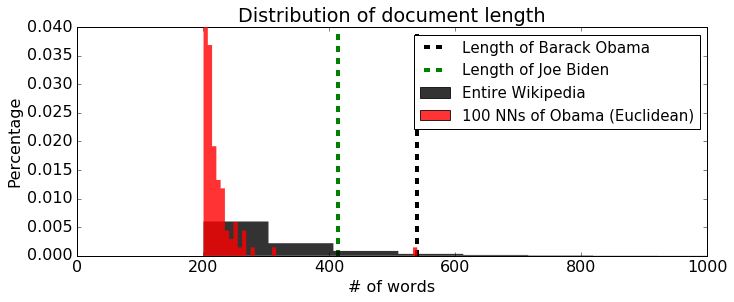

In [118]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [119]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine') # Use cosine distance
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_cosine = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_cosine

+-------+-------------------------+--------+--------------------+
|   id  |           name          | length |      distance      |
+-------+-------------------------+--------+--------------------+
| 35817 |       Barack Obama      |  540   | -1.11022302463e-15 |
| 24478 |        Joe Biden        |  414   |   0.703138676734   |
| 38376 |      Samantha Power     |  310   |   0.742981902328   |
| 57108 |  Hillary Rodham Clinton |  580   |   0.758358397887   |
| 38714 | Eric Stern (politician) |  255   |   0.770561227601   |
| 46140 |       Robert Gibbs      |  257   |   0.784677504751   |
|  6796 |       Eric Holder       |  232   |   0.788039072943   |
| 44681 |  Jesse Lee (politician) |  216   |   0.790926415366   |
| 18827 |       Henry Waxman      |  279   |   0.798322602893   |
|  2412 |     Joe the Plumber     |  217   |   0.799466360042   |
+-------+-------------------------+--------+--------------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can

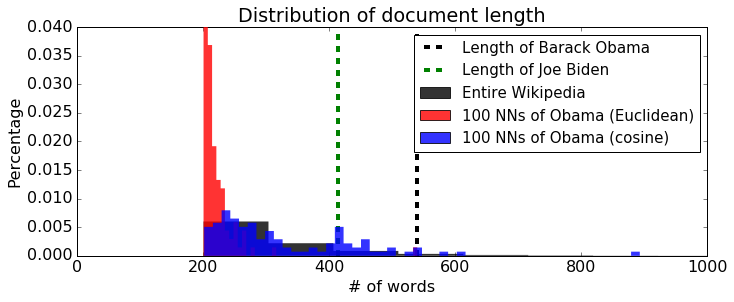

In [120]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

### Problem with cosine distances: tweets vs. long articles

In [121]:
tweet = {'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [122]:
word_indices = [map_index_to_word[map_index_to_word['category']==word][0]['index'] for word in tweet.keys()]
tweet_tf_idf = csr_matrix((list(tweet.values()), ([0]*len(word_indices), word_indices)), shape=(1, tf_idf.shape[1]))

In [124]:
print tweet_tf_idf

  (0, 546136)	4.26146174706
  (0, 546279)	4.16757132395
  (0, 546835)	3.7217652113
  (0, 547084)	3.45977782787
  (0, 547347)	3.10267217433
  (0, 547556)	2.76447895202
  (0, 547685)	2.45382262696
  (0, 547972)	0.0469449376818
  (0, 547976)	0.000965406350121


In [125]:
from sklearn.metrics.pairwise import cosine_distances

obama_tf_idf = tf_idf[35817]
print cosine_distances(obama_tf_idf, tweet_tf_idf)

[[ 0.70591838]]


In [126]:
distances, indices = model2_tf_idf.kneighbors(obama_tf_idf, n_neighbors=10)
print distances

[[ -1.11022302e-15   7.03138677e-01   7.42981902e-01   7.58358398e-01
    7.70561228e-01   7.84677505e-01   7.88039073e-01   7.90926415e-01
    7.98322603e-01   7.99466360e-01]]
